Pedro Vinicius Alves - 10727865

In [2]:
import pandas as pd
from scipy.stats import chi2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#jupyter nbconvert --no-input --to pdf Untitled.ipynb


# Questão 1.1.4

Entrada dos dados:

In [2]:
headers = ['sales', 'profits','assets']
exames = ['Citigroup', 'General Electric', 'American Group', 'Bank of America',
         'HSBC', 'ExxonMobil', 'Royal Dutch/Shell', 'BP','ING Group', 'Toyota Motor']

freq = np.array([[108.28,152.36,95.04,65.45,62.97,263.99,265.19,285.06,92.01,165.68],
        [17.05,16.59,10.91,14.14,9.52,25.33,18.54,15.73,8.1,11.13],
        [1484.1,750.33,766.42,1110.46,1031.29,195.26,193.83,191.11,1175.16,211.15]])
df = pd.DataFrame(freq.T,index= exames,columns = headers)
df

,sales,profits,assets
Citigroup,108.28,17.05,1484.10
General Electric,152.36,16.59,750.33
American Group,95.04,10.91,766.42
Bank of America,65.45,14.14,1110.46
HSBC,62.97,9.52,1031.29
ExxonMobil,263.99,25.33,195.26
Royal Dutch/Shell,265.19,18.54,193.83
BP,285.06,15.73,191.11
ING Group,92.01,8.10,1175.16
Toyota Motor,165.68,11.13,211.15


Analisando o gráfico abaixo, podemos notar que 'sales' parece ter uma correlação positiva com 'profits', pois os pontos nos levam a crer que haja uma tendência crescente entre eles.

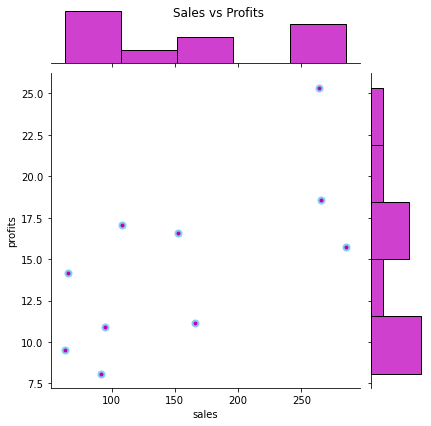

In [3]:
p1 = sns.jointplot(x= df.sales,y = df.profits,
              data = df, color = 'm', kind = 'scatter',
              edgecolor = 'skyblue', linewidth = 2)
p1.fig.suptitle("Sales vs Profits")
plt.show()

In [4]:
np.cov(df['sales'],df['assets'], bias = True)

array([[  6728.807921, -32018.363613],
       [-32018.363613, 213348.842849]])

In [5]:
x1_bar = np.mean(df['sales'])
x2_bar = np.mean(df['profits'])
x1_sd = np.var(df['sales'])
x2_sd = np.var(df['profits'])
x12_covar = np.cov(df['sales'],df['profits'], bias = True)[0][1]
pearson = x12_covar/(np.sqrt(x1_sd*x2_sd))


index = ['Profits', 'Sales']
header = ['Mean', 'Variance', 'Covariance', "Pearson's Correlation"]
data = np.array([
    [x1_bar, x1_sd, x12_covar, pearson ],
    [x2_bar, x2_sd, x12_covar, pearson]
], dtype = object)


df_measures = pd.DataFrame(data= data,index = index, columns = header)
df_measures

,Mean,Variance,Covariance,Pearson's Correlation
Profits,155.603,6728.807921,273.256758,0.686136
Sales,14.704,23.571284,273.256758,0.686136


Calculando o coeficiente de Pearson para as duas variáveis obtemos o valor de 0.68, o que implica que as duas variáveis analisadas tem correlação linear positiva.

# Questão 1.1.5

## a) Gráficos de Dispersão 

A variável 'sales' parece ter uma correlação negativa com 'assets', já que quando a primeira aumenta, a segunda tende a diminuir.

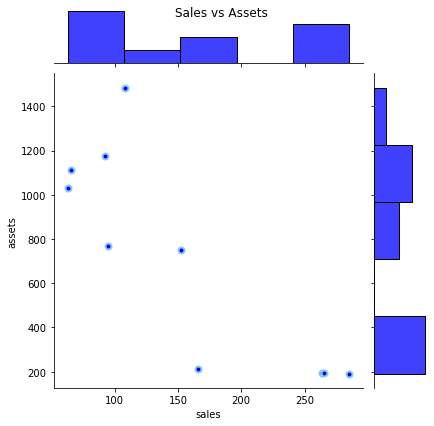

In [39]:
p2 = sns.jointplot(x= df.sales,y = df.assets,
              data = df, color = 'blue', kind = 'scatter',
              edgecolor = 'skyblue', linewidth = 2)
p2.fig.suptitle("Sales vs Assets")
plt.show()

Um comportamento parecido com o gráfico anterior pode ser observado entre 'profits' e 'assets', mas nese caso temos uma variabilidade maior, logo é esperado que o grau de associação entre as duas variáveis seja mais fraco do que o grau de associação entre 'sales' e 'assets'.

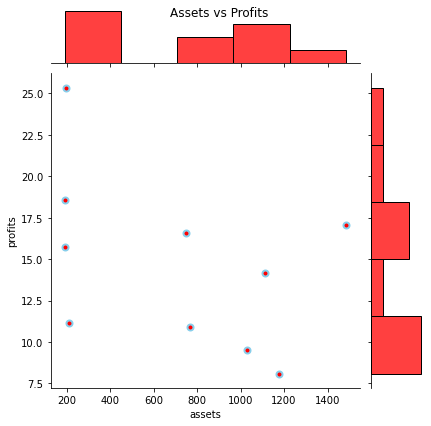

In [38]:
p3 = sns.jointplot(x= df.assets,y = df.profits,
              data = df, color = 'r', kind = 'scatter',
              edgecolor = 'skyblue', linewidth = 2)
p3.fig.suptitle("Assets vs Profits")
plt.show()

## b) Média, variância e correlação (usando estimador viciado)

In [62]:
print('Vetor coluna de médias:', df.mean().to_numpy().T)

Vetor coluna de médias: [155.603  14.704 710.911]


In [83]:
print('Matriz de covariância: \n' , df.cov(ddof = 0).to_numpy())

Matriz de covariância: 
 [[ 6.72880792e+03  2.73256758e+02 -3.20183636e+04]
 [ 2.73256758e+02  2.35712840e+01 -9.48444654e+02]
 [-3.20183636e+04 -9.48444654e+02  2.13348843e+05]]


In [92]:
print('Matriz de Correlação: \n', df.corr().to_numpy())

Matriz de Correlação: 
 [[ 1.          0.68613603 -0.84505489]
 [ 0.68613603  1.         -0.42293656]
 [-0.84505489 -0.42293656  1.        ]]


Analisando a matriz de correlação, confirmamos nossa hipótese de que 'sales' e 'assets' tem um grau de associação mais forte do que 'sales' e 'profits' e que ambos os pares possuem uma correlação negativa.

## Questão 1.1.22

Abaixo graficamos algumas combinações das covariáveis.

In [3]:
df = pd.read_csv('oxygen_formatted.csv')
df.columns = ['X1m Resting O2 (L/min)', 'X2m Resting O2 (mL/kg/min)', 'X3m Maximum O2 (L/min)', 'X4m Maximum O2 (mL/kg/min)',
             'X1f Resting O2 (L/min)', 'X2f Resting O2 (mL/kg/min)', 'X3f Maximum O2 (L/min)', 'X4f Maximum O2 (mL/kg/min)']


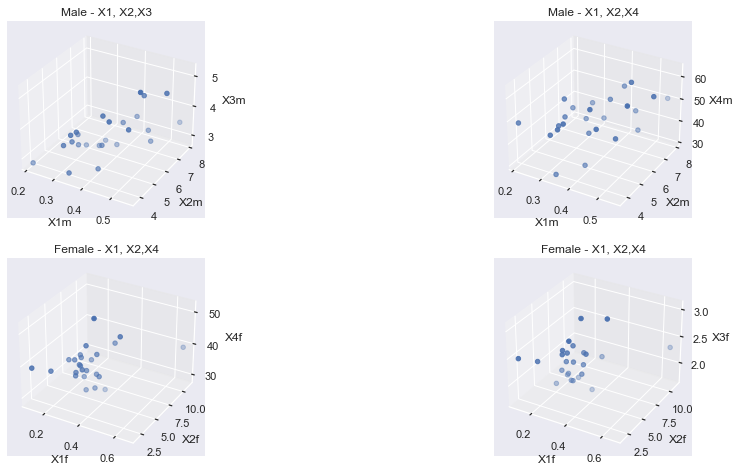

In [4]:



sns.set(rc={'figure.figsize':(11.7,8.27)})
#plot 1
sns.set(style = "darkgrid")

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(2,2,1, projection = '3d')

ax.set_title("Male - X1, X2,X3")
ax.set_xlabel("X1m")
ax.set_ylabel("X2m")
ax.set_zlabel("X3m")

plot1 = ax.scatter('X1m Resting O2 (L/min)', 'X2m Resting O2 (mL/kg/min)', 'X3m Maximum O2 (L/min)', data = df)



#plot 2
sns.set(style = "darkgrid")

ax = fig.add_subplot(2,2,2, projection = '3d')

ax.set_title("Male - X1, X2,X4")
ax.set_xlabel("X1m")
ax.set_ylabel("X2m")
ax.set_zlabel("X4m")

plot2 = ax.scatter('X1m Resting O2 (L/min)', 'X2m Resting O2 (mL/kg/min)', 'X4m Maximum O2 (mL/kg/min)', data = df)


sns.set(style = "darkgrid")

ax = fig.add_subplot(2,2,3, projection = '3d')

ax.set_title("Female - X1, X2,X4")
ax.set_xlabel("X1f")
ax.set_ylabel("X2f")
ax.set_zlabel("X4f")

plot3 = ax.scatter('X1f Resting O2 (L/min)', 'X2f Resting O2 (mL/kg/min)', 'X4f Maximum O2 (mL/kg/min)', data = df)


#plot 4
sns.set(style = "darkgrid")

ax = fig.add_subplot(2,2,4, projection = '3d')

ax.set_title("Female - X1, X2,X4")
ax.set_xlabel("X1f")
ax.set_ylabel("X2f")
ax.set_zlabel("X3f")

plot3 = ax.scatter('X1f Resting O2 (L/min)', 'X2f Resting O2 (mL/kg/min)', 'X3f Maximum O2 (L/min)', data = df)

## b) Distância de Mahalanobis

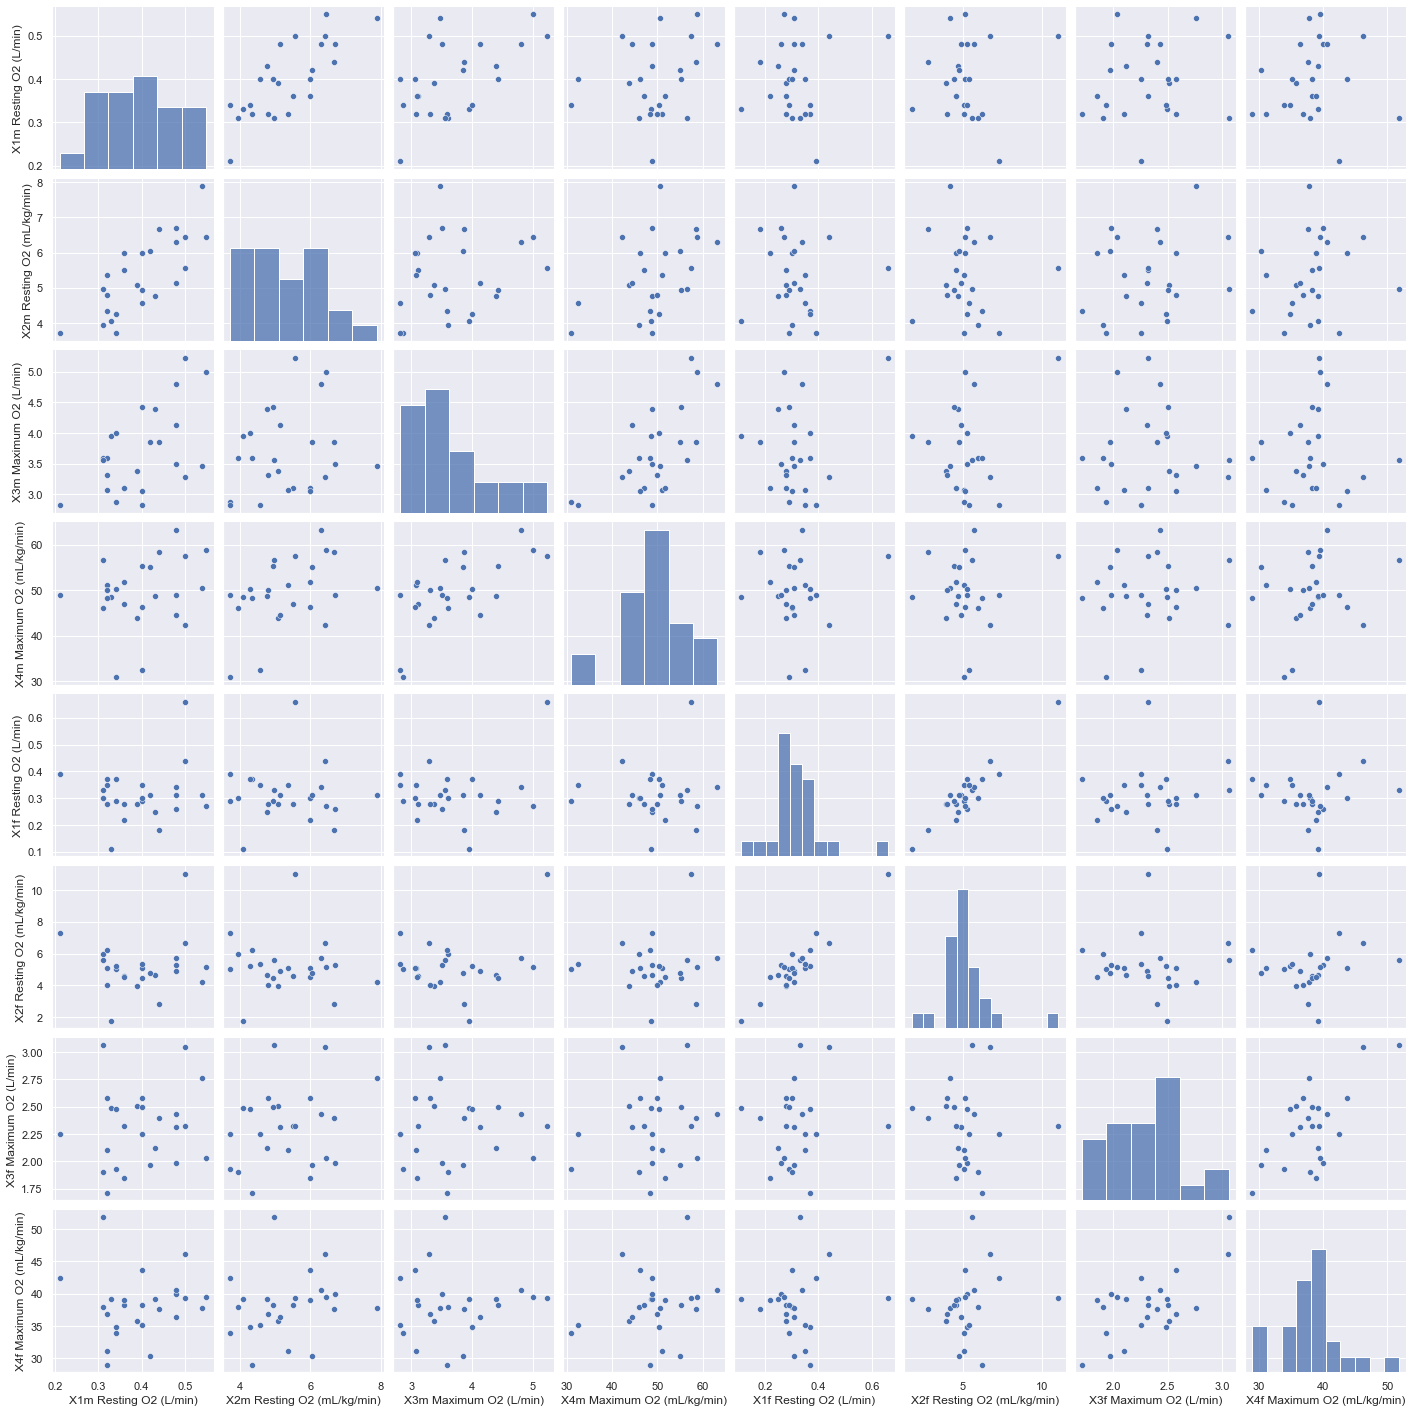

In [103]:
sns.pairplot(df)

O alto número de possíveis combinações de covariáveis tornam a visualização de possíveis outliers deveras desafiante. Para contornar esse problema, aplicamos a distância de Mahalanobis em algumas combinações para visualizar esses valores. 

In [5]:
df_1 = df[['X1m Resting O2 (L/min)', 'X3m Maximum O2 (L/min)']]
df_2 = df[['X1f Resting O2 (L/min)', 'X3f Maximum O2 (L/min)']]
df_3 = df[['X1m Resting O2 (L/min)', 'X1f Resting O2 (L/min)']]
df_4 = df[['X3m Maximum O2 (L/min)','X3f Maximum O2 (L/min)']]


In [14]:
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

def outlier_analysis(df):
    print(df.columns[0], 'vs', df.columns[1])
    
    df = df.to_numpy()
    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)
    
    print('---Centróide da Distribuição---')
    print(centerpoint)


    # Distances between center point and 
    distances = []
    return df
    for i, val in enumerate(df):
          p1 = val
          p2 = centerpoint
          distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
          distances.append(distance)
    distances = np.array(distances)
    
    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    print('--- Index dos Outliers ----')
    print(outlierIndexes)
    # array([24, 35, 67, 81])

    print('--- Observações outliers -----')
    print(df[ distances > cutoff , :])


    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)

    # Ellipse patch
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
    
    ellipse.set_facecolor('#0984e3')
    ellipse.set_alpha(0.5)
    fig = plt.figure()
    ax = plt.subplot()
    ax.add_artist(ellipse)
    plt.scatter(df[: , 0], df[ : , 1])
    plt.show()



In [15]:
outlier_analysis(df_1)

X1m Resting O2 (L/min) vs X3m Maximum O2 (L/min)
---Centróide da Distribuição---
[0.3972 3.6876]


array([[0.34, 2.87],
       [0.39, 3.38],
       [0.48, 4.13],
       [0.31, 3.6 ],
       [0.36, 3.11],
       [0.33, 3.95],
       [0.43, 4.39],
       [0.48, 3.5 ],
       [0.21, 2.82],
       [0.32, 3.59],
       [0.54, 3.47],
       [0.32, 3.07],
       [0.4 , 4.43],
       [0.31, 3.56],
       [0.44, 3.86],
       [0.32, 3.31],
       [0.5 , 3.29],
       [0.36, 3.1 ],
       [0.48, 4.8 ],
       [0.4 , 3.06],
       [0.42, 3.85],
       [0.55, 5.  ],
       [0.5 , 5.23],
       [0.34, 4.  ],
       [0.4 , 2.82]])

X1f Resting O2 (L/min) vs X3f Maximum O2 (L/min)
---Centróide da Distribuição---
[0.3136 2.3152]
--- Index dos Outliers ----
(array([22], dtype=int64),)
--- Observações outliers -----
[[0.66 2.32]]


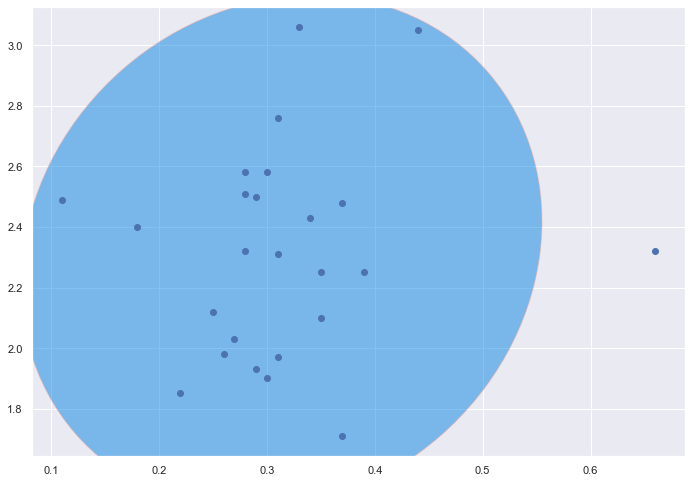

In [116]:
outlier_analysis(df_2)

X1m Resting O2 (L/min) vs X1f Resting O2 (L/min)
---Centróide da Distribuição---
[0.3972 0.3136]
--- Index dos Outliers ----
(array([ 8, 22], dtype=int64),)
--- Observações outliers -----
[[0.21 0.39]
 [0.5  0.66]]


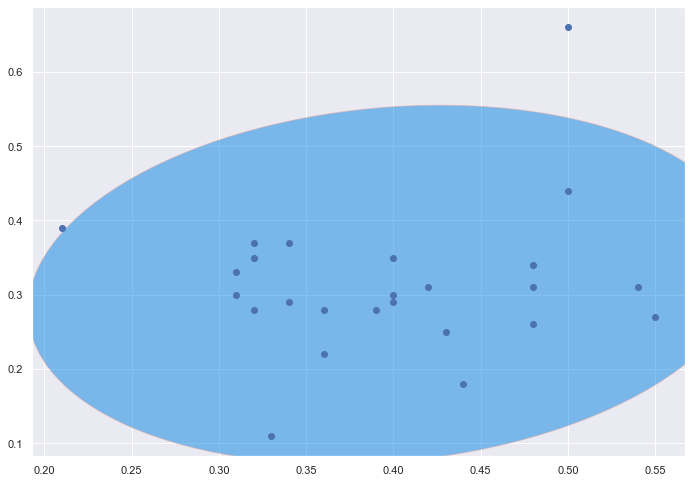

In [117]:
outlier_analysis(df_3)

Uma análise mais aprofundada dos outliers pode ser feita em um estudo posterior da adequabilidade do modelo proposto para o conjunto de dados.

# Questão 3 - 

Entrada dos dados:

In [2]:
headers = ['Até 18 anos', '18 a 30 anos','30 a 45 anos', '45 anos ou mais']
exames = ['Sangue', 'Endoscopia', 'Eletrocardiograma', 'Outros']


freq = [[60,10,6,24],[100,24,6,30],[150,100,20,40],[350,80,60,50]]
df = pd.DataFrame(freq,index= exames,columns = headers)
df.loc['Row_Total']= df.sum(numeric_only=True, axis=0)
df.loc[:,'Column_Total'] = df.sum(numeric_only=True, axis=1)
df = df.T
df

,Sangue,Endoscopia,Eletrocardiograma,Outros,Row_Total
Até 18 anos,60,100,150,350,660
18 a 30 anos,10,24,100,80,214
30 a 45 anos,6,6,20,60,92
45 anos ou mais,24,30,40,50,144
Column_Total,100,160,310,540,1110


Cálculo de frequência relativas:

In [3]:
df_freq = df/1110
df_freq


,Sangue,Endoscopia,Eletrocardiograma,Outros,Row_Total
Até 18 anos,0.054054,0.090090,0.135135,0.315315,0.594595
18 a 30 anos,0.009009,0.021622,0.090090,0.072072,0.192793
30 a 45 anos,0.005405,0.005405,0.018018,0.054054,0.082883
45 anos ou mais,0.021622,0.027027,0.036036,0.045045,0.129730
Column_Total,0.090090,0.144144,0.279279,0.486486,1.000000


Se o exame e idade não forem associados, é esperado, pela definição de independência de eventos, que o produto das frequências das marginais sejam iguais as frequências observadas para todas as observações.

In [4]:
teste = []
for i in df_freq:
    for j in df_freq.index:
        teste.append(df_freq[i][j] == df[i]['Column_Total']*df['Row_Total'][j])

if False in teste:
    print('Variáveis Não Independentes')

Variáveis Não Independentes


In [5]:
# Função para cálculo de Q2 e teste de associação
def q(df_freq,df):
    total = 0
    for i in df_freq:
        for j in df_freq.index:
            expected = df[i]['Column_Total']*df['Row_Total'][j]/1110
            total += (df[i][j] - expected)**2/expected
    
    if total == 0:
        print('Ausência de associação')
    
    else:
        if total > chi2.ppf(0.05, (len(df_freq.index)-2)*(len(df_freq.columns)-2)):
            print('Rejeita-se H0')
            print(f'Qui-quadrado de Pearson: {total}')
            
        else:
            print('Não rejeitamos H0')
            print(f'Qui-quadrado de Pearson: {total}')
            

q(df_freq, df)

Rejeita-se H0
Qui-quadrado de Pearson: 78.19635457258168


Logo,  ao nível de significância de 5%, rejeitamos a hipótese de que não há relação entre as variáveis. Calculando o coeficiente de Tschuprow, obtemos:

In [8]:

def coef_t(q, df_freq):
    t = np.sqrt(q/(1110)*(1/np.sqrt(9)))
    return t

t = coef_t(78.1963,df_freq)

print(f'Coeficiente de Tschuprow: {t}')
#print(f'Coeficiente de Tschuprow:{t}')

Coeficiente de Tschuprow: 0.15323959139978274
